In [ ]:
# This Notebook is to look at the filtered data in both the time and frequency domains!

In [2]:
# The autoreload extension will auto-refresh the changes made in filtering.py without needing to restart the kernel.
# Just remember to save your changes (cmd + s) in your .py file!
%load_ext autoreload
%autoreload 2
# Import a couple of classes.
from filtering import ObtainData
from filtering import BasicPlottingFiltering
from leak_detection import LeakDetection

In [23]:
# Compute the Matched Filter snr_sigma for all tests (excluding those with frequencies greater than 900).
# For each test, compute the matched filter snr_sigma for frequencies at 25 Hz intervals, from 100 to 900 Hz.
# snr_sigma is just the highest matched filter value divided by estimated noise, meaning that is just one number. Thus, it can be misleading.

import pandas as pd
from itertools import chain
# Prepare an empty list to store the data
data = []
# Loop over test numbers and frequencies
for test_number in chain(range(1, 22), range(32, 67), range(71, 78), range(85, 107)):
    plotter = BasicPlottingFiltering(test_number)
    for frequency in range(100, 925, 2):
        snr_sigma = plotter.matched_filter_snr_sigma_matched_output_average(frequency)
        # Append a row with test_number, frequency, and snr_sigma
        data.append([test_number, frequency, snr_sigma, plotter.leak, plotter.excitation, plotter.frequency])

# Create a DataFrame from the list
df = pd.DataFrame(data, columns=['Test Number', 'Frequency (Hz)', 'SNR Sigma', 'Leak', 'Excitation', 'Actual Inputted Frequency'])

# Now, estimate the frequency with determining the max snr_sigma for each test number, and seeing for how many of the tests 
max_snr_per_test = df.loc[df.groupby("Test Number")["SNR Sigma"].idxmax()]
tolerance = 25s  # Hz
max_snr_per_test["Correct"] = ((max_snr_per_test["Frequency (Hz)"] - max_snr_per_test["Actual Inputted Frequency"]).abs() <= tolerance)
# max_snr_per_test["Correct"] = (max_snr_per_test["Frequency (Hz)"] == max_snr_per_test["Actual Inputted Frequency"])
accuracy = max_snr_per_test["Correct"].mean()
print(accuracy)

# Optionally, save to CSV
df.to_csv('snr_sigma_table.csv', index = False)


0.07058823529411765


In [17]:
# # Matched Filter Response....
# plotter_active_400_Hz = BasicPlottingFiltering(56)
# # plotter_active_400_Hz.matched_filter_1(400)
# plotter_active_400_Hz.throwaway_function(400)

# plotter_passive_control_400_Hz = BasicPlottingFiltering(32)
# plotter_passive_control_400_Hz.throwaway_function(400)
# # plotter_passive_control_400_Hz.matched_filter_1(400)

# plotter_active_450_Hz = BasicPlottingFiltering(12)
# plotter_active_450_Hz.throwaway_function(450)
# # plotter_active_450_Hz.matched_filter_1(450)

# plotter_active_500_Hz = BasicPlottingFiltering(58)
# plotter_active_500_Hz.throwaway_function(500)

# plotter_passive_control_450_Hz = BasicPlottingFiltering(2)
# # plotter_passive_control_450_Hz.matched_filter_1(450)

# plotter_active_850_Hz = BasicPlottingFiltering(65)
# plotter_active_850_Hz.throwaway_function(850)

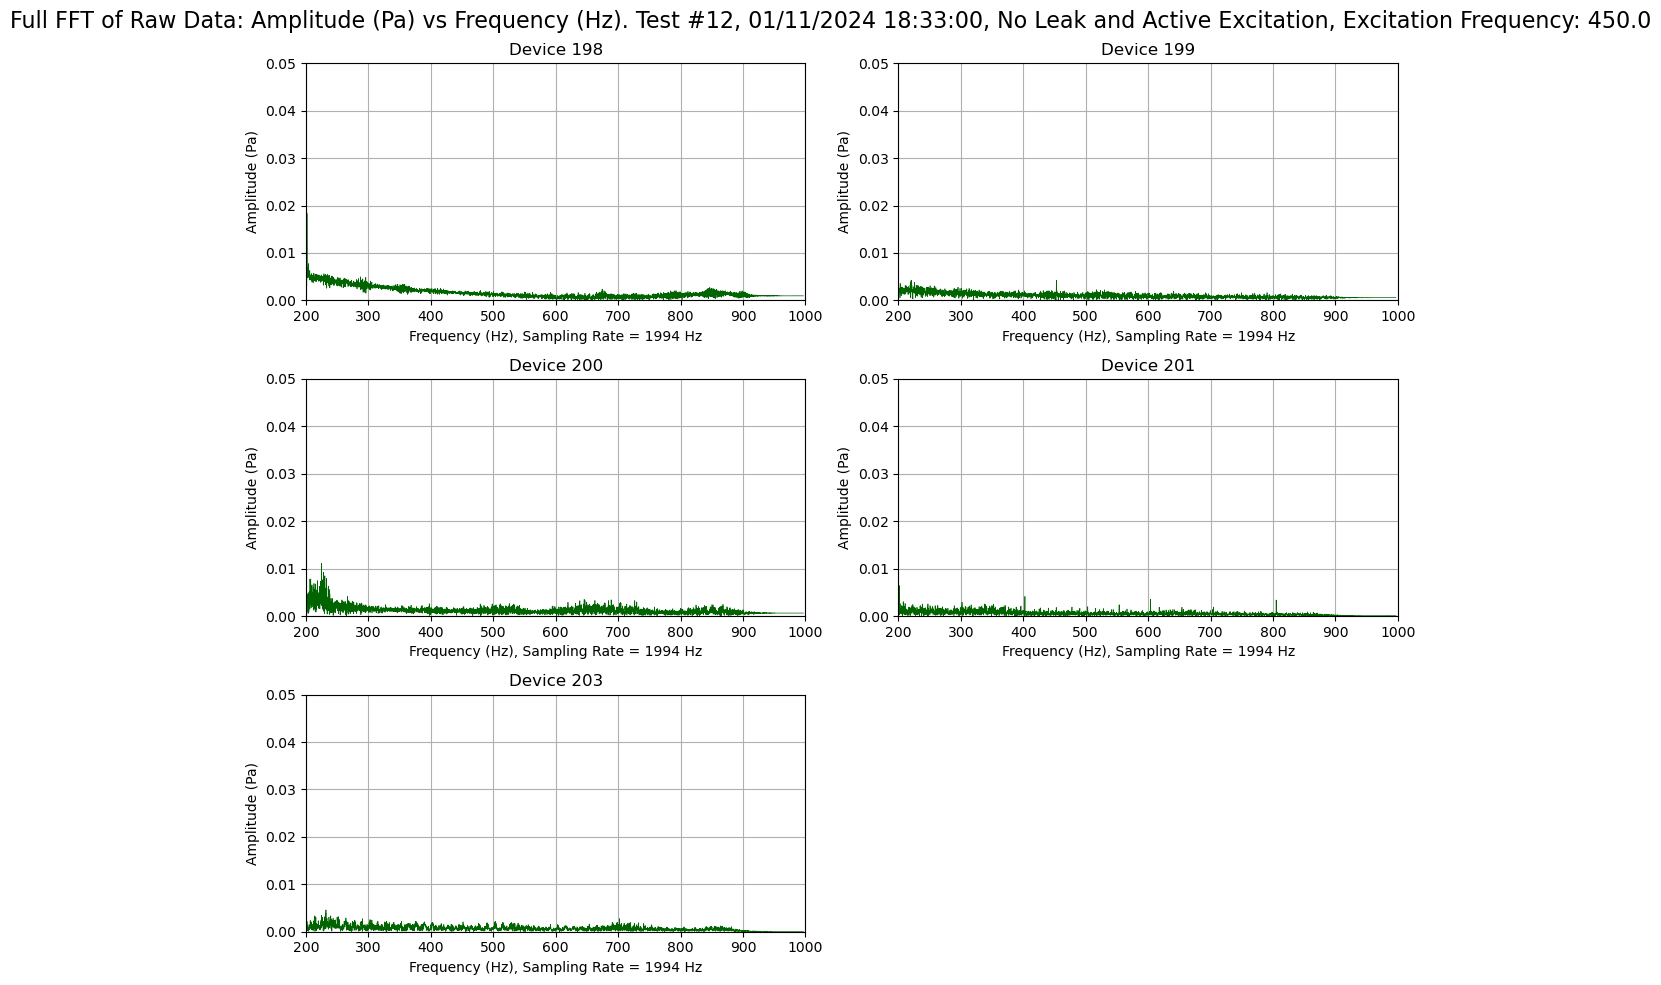

In [10]:
# Plot the impulse responses of a couple bandpass FIR filters!
plotter_1 = BasicPlottingFiltering(1)
#plotter_1.bandpass_FIR_filter(5,30, plot_IR = True, plot_filtered = False)
# plotter_1.bandpass_IIR_filter(order = 4, plot_IR = True)
plotter_40 = BasicPlottingFiltering(40)
# plotter_40.bandpass_FIR_filter(5,30)
plotter_71 = BasicPlottingFiltering(71)
# plotter_71.bandpass_FIR_filter(5,30)

# Plot the filtered data for all of the no leak passive excitation tests.
'''
obtain = ObtainData(1)
no_leak_passive_tests = obtain.return_passive_no_leak()
for i in range(len(no_leak_passive_tests)):
    plotter = BasicPlottingFiltering(no_leak_passive_tests[i])
    plotter.bandpass_FIR_filter()
'''

# Plot the spectrogram?
# plotter = BasicPlottingFiltering(28)
# plotter.plot_spectrogram()

# # Plot the active no leaks just to check them out.
# for i in range(5,32) :
#     plotter_active = BasicPlottingFiltering(i)
#     plotter_active.plot_raw_data_in_frequency(power_spectrum = True)

plotter_active = BasicPlottingFiltering(12)
plotter_active.plot_raw_data_in_frequency(power_spectrum = False)

# Plot the filtered data for all of the no leak and active excitation tests.
# obtain = ObtainData(1)
# no_leak_active_tests = obtain.return_active_no_leak()
# for i in range(len(no_leak_active_tests)) :
#     plotter = BasicPlottingFiltering(no_leak_active_tests[i])
#     plotter.plot_raw_data_in_frequency()
#     # plotter.bandpass_FIR_filter()

In [4]:
test_1 = LeakDetection()
test_1.power_spectrum_analysis(1)
test_1.power_spectrum_analysis(1, filtered = True)

test_32 = LeakDetection()
test_32.power_spectrum_analysis(32)
test_32.power_spectrum_analysis(32, filtered = True)

test_40 = LeakDetection()
test_40.power_spectrum_analysis(40)
test_40.power_spectrum_analysis(40, filtered = True)

test_71 = LeakDetection()
test_71.power_spectrum_analysis(71)
test_71.power_spectrum_analysis(71, filtered = True)

test_89 = LeakDetection()
test_89.power_spectrum_analysis(89)
test_89.power_spectrum_analysis(89, filtered = True)

test_90 = LeakDetection()
test_90.power_spectrum_analysis(90)
test_90.power_spectrum_analysis(90, filtered = True)

test_107 = LeakDetection()
print(test_107.power_spectrum_analysis(107))
print(test_107.power_spectrum_analysis(107, filtered = True))

([np.float64(29.98796871866854), np.float64(32.38700621616202), np.float64(10.195909364347303), np.float64(24.989973932223783), np.float64(13.394626027671947)], [np.float32(0.0004278707), np.float32(0.0008924706), np.float32(3.7074922e-05), np.float32(0.0026398778), np.float32(0.00034475757)], np.float64(22.19109685181472), np.float32(0.00086841034))
([np.float64(29.78804892721075), np.float64(32.38700621616202), np.float64(14.194305193503109), np.float64(25.189893723681575), np.float64(22.5909364347303)], [np.float64(0.0003411279737919473), np.float64(0.0006186929385531819), np.float64(2.359442184379633e-05), np.float64(2.4489162063175416e-05), np.float64(8.0283404434491e-06)], np.float64(24.830038099057553), np.float64(0.00020318656733910997))


In [5]:
# Print the Dataframe with all of the data!
print(test_32.combine_into_dataframe())

     Mean Spectral Rolloff, Raw Data  Mean Spectral Rolloff, Filtered Data  \
1                          23.110728                             26.029557   
2                          33.786445                             27.668899   
3                          32.107119                             26.549348   
4                          27.988771                             26.429396   
5                          31.427391                             25.229878   
..                               ...                                   ...   
106                        39.304231                             30.427792   
107                        22.191097                             24.830038   
108                        38.624504                             29.748065   
109                        41.983156                             29.548145   
110                        38.824424                             31.507359   

     Mean Spectral Flatness, Raw Data  Mean Spectral Flatness, 

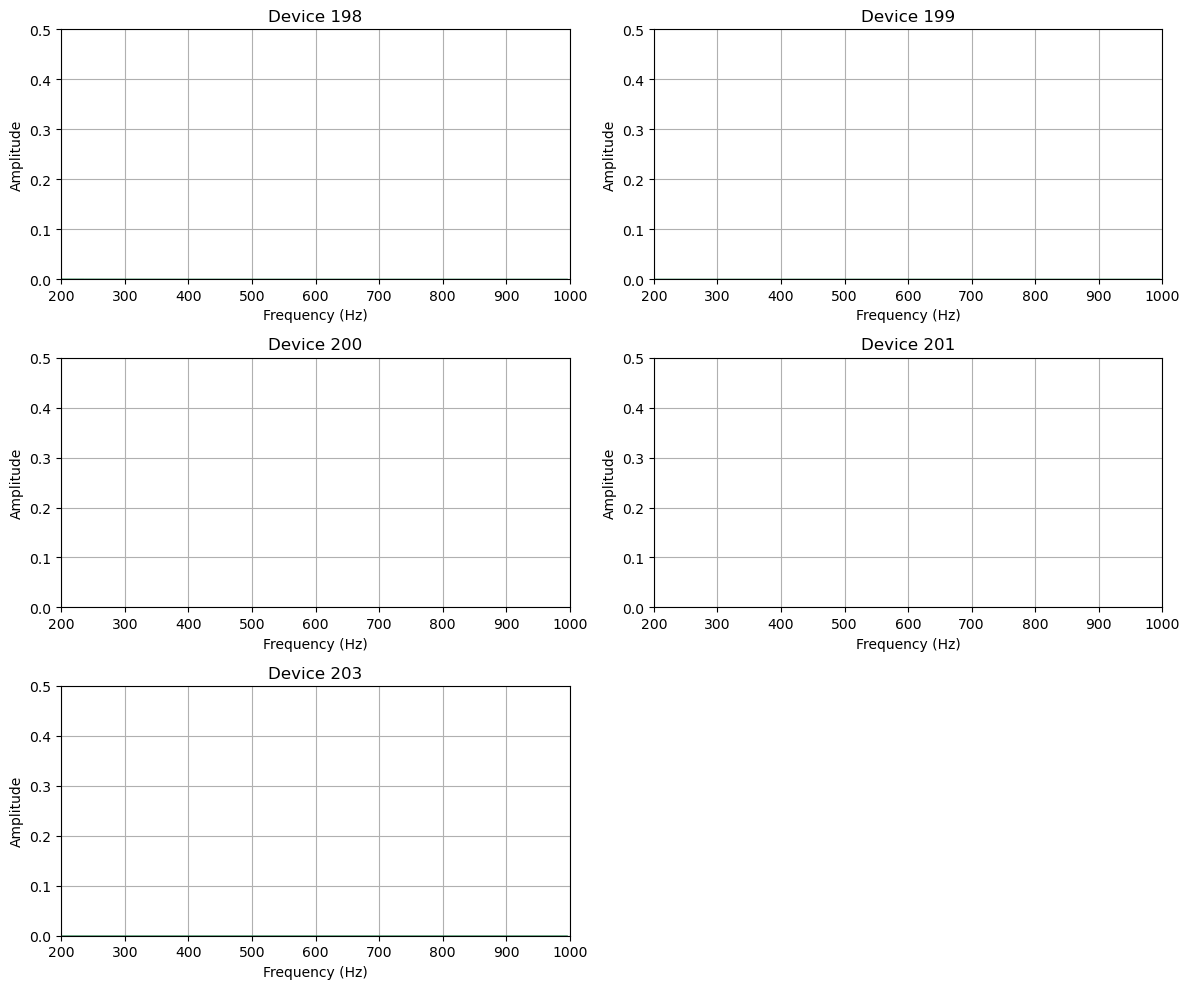

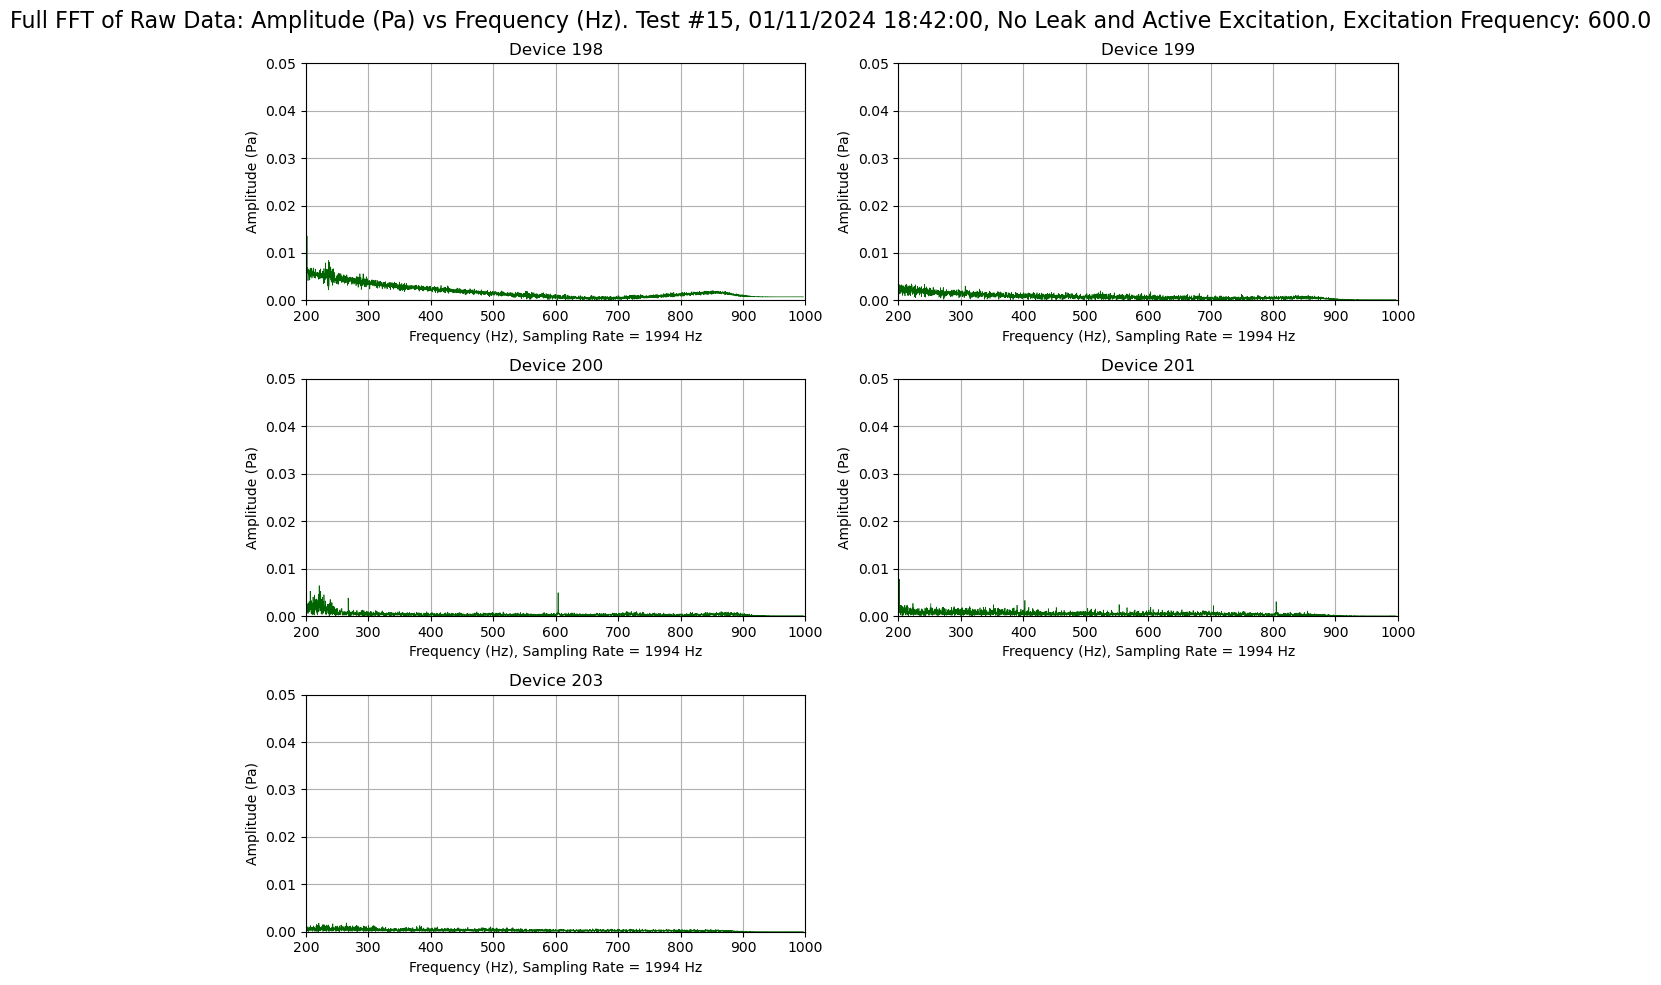

In [57]:
# Attempts to do things related to spectral stacking.
tester = LeakDetection()
tester.compute_spectral_stack_1(15)

plotter_active = BasicPlottingFiltering(15)
plotter_active.plot_raw_data_in_frequency(power_spectrum = True)

In [37]:
# This line will convert this notebook into a .py file.
# ! to indicate that it is a shell command, not Python!
# Just make sure to save before you run everything!
!jupyter nbconvert --to script /home/jovyan/SRI_Lab/Code/Plot_Filtered_Data.ipynb --output-dir=/home/jovyan/SRI_Lab/Code/Notebooks_Transformed_To_Pys

[NbConvertApp] Converting notebook /home/jovyan/SRI_Lab/Code/Plot_Filtered_Data.ipynb to script
[NbConvertApp] Writing 2069 bytes to /home/jovyan/SRI_Lab/Code/Notebooks_Transformed_To_Pys/Plot_Filtered_Data.py
